# Noise: Red, White, Pink


## White noise
White noise is an uncorrelated, independent and completely random noise. A simple example is counting, photon-limited situation (e.g., sampled from a Poisson/Gaussian distribution).  For instance, we have a simple periodic signal but we don't know the exact brightness of each data point because of this uncertainty.  When you take the Fourier transform or create the power spectrum, it is like you are superimposing an infinite set of frequencies on top of the real signal to account for every unreal statistical variation; there is no preference for a particular frequency because it is *completely* random and no data point knows about the other.

Take for example a planetary transit. Your ability to significantly detect the transit depends on the uncertainty in the depth of the transit. For white noise, it is just the standard deviation of the mean, $$ \sigma_d  = \frac{\sigma_i}{\sqrt(n)}, $$ where $\sigma_i$ are the uncertainties of all the datapoints inside the transient and $n$ is the number of data points.

Often in astronomy, measurements are not independent because of changes in airmass, atmospheric conditions, tracking, flafielding, etc. which cause correlation between neighboring data points.  This creates covariance or dependence between the datapoints, which we can most simply represent added in as a standard quadrature sum,

$$ \sigma^2_d =  \frac{\sigma_i^2}{\sqrt(n)} + \frac{1}{\sqrt(n^2)} \sum_{i\neq j} C_{ij},$$

where $C_{ij}$ are the covariance coefficients. Correlated noise occurs when the 2nd term is not much smaller than the 1st.  Here are some demonstrative and real example light curves with uncorrelated (white) and correlated noise:

<img src="1.png">

<img src="2.png">

<a href="http://cdsads.u-strasbg.fr/abs/2006MNRAS.373..231P">2006MNRAS.373..231P</a>


## Power Spectra

What do the power spectra look like?  The power spectrum for noise is generally characterized by a powerlaw, $P \propto \frac{1}{\nu^\alpha}$. For white noise $\alpha = 0$ (no frequency dependence).


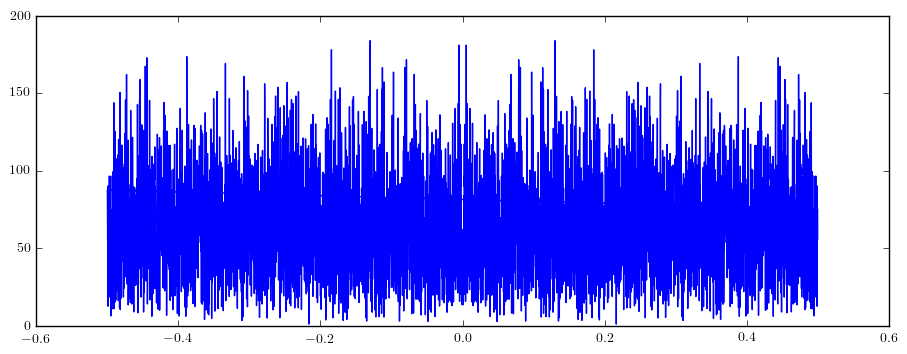

In [2]:
import random
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
%matplotlib inline

N = 5000

t = np.linspace(0, 1, N)
wn = np.random.normal(loc=0.0, scale=1.0, size=N)

DFT = np.fft.fft(wn)
freq = np.fft.fftfreq(wn.size)
figure = plt.figure(figsize=(11, 4.0))
plt.plot(freq, np.abs(DFT))
plt.show()

## Red Noise

One particular case is red or brownian noise where $\alpha = 2$ or the random walk.  A random walk draws each step randomly, but the final position depends on all of the previous positions.  This creates a correlated signal.  At a time, t, this is just the sum or integral of all of the previous steps,
$$ BM/RN = \int_0^t [Gaussian] dt$$

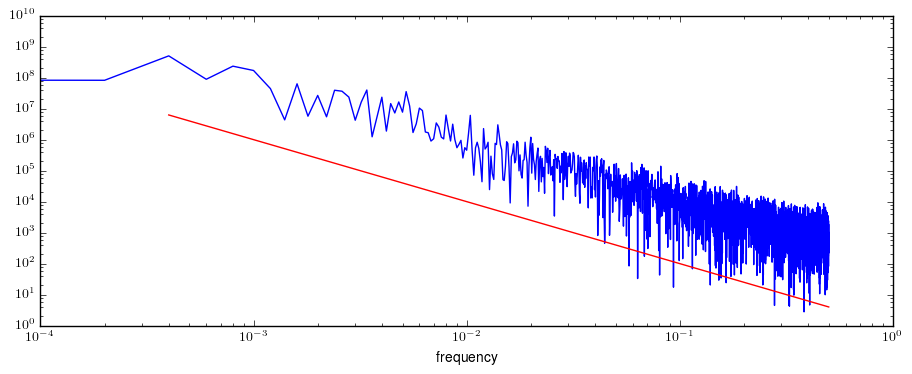

In [3]:
rn = []
for i in range(1,len(wn)+1):
    rn.append(sum(wn[:i]))

rn = np.array(rn)
DFT = np.fft.fft(rn)
freq = np.fft.fftfreq(rn.size)
figure = plt.figure(figsize=(11, 4.0))
plt.plot(freq[:N/2], np.abs(DFT[:N/2])**2)

x = np.linspace(freq[2], freq[N/2-1], 50)
y = 1.0/x**2
#y = map(lambda a: 1.0/a**2,x)

plt.plot(x,y,'r')

plt.yscale("log")
plt.xscale("log")
plt.xlabel("frequency")
plt.show()

## Other Types of Noise (Pink)

If noise is a mix or has slopes in between red and white, we call it pink noise, where the powerlaw has the slopes:

$\alpha = 0$ - white noise <br>
$-2 < \alpha < 0$ - pink noise <br>
$\alpha \equiv -1 $ - "pure" pink noise (a.k.a. flicker noise)<br>
$\alpha \equiv -2 $ - red noise (a.k.a. brownian noise)<br>

$S(f)$ is related to the autocorrelation function $r_{xx}(\tau)=E[x(t)x(t-\tau)]$ by the <a href="https://en.wikipedia.org/wiki/Wiener%E2%80%93Khinchin_theorem">Wiener–Khinchin theorem</a>. A quantity with a 1/f power spectrum cannot be characterized by a single correlation time. In fact, the 1/f spectrum implies some correlation in x(t) over all time scales corresponding to the frequency range for which S(f) is 1/f-like. In general, a negative slope for S(t) implies some degree of correlation in x(t) over time scales of roughly $1/2\pi f$. A steep slope implies a higher degree of correlation than a shallow slope.

<img src="3.jpg">


# Damped random walk (a.k.a. AR(1) - autoregressive process of oder 1  )
$x_i = \phi x_{i-1} + w_i$, where $0<\phi<1$ it sets a characteristic timescale $\tau$ after which the contribution of the previous value of the series will be relatively insignificant, i.e. $\tau$ is the *decorelation timescale*.
AR(1) process is memoryless or Markov process. <br><br>

$ PSD(f) = \frac{1}{f^2}$  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;  for $f>1/\tau$<br>
$ PSD(f) =const$     &nbsp;&nbsp;&nbsp;   for $f<1/\tau$

## Quasars follow DRW process
<img src="4.png">

MacLeod et al. (2010, 2012) found that $\tau$ increases with increasing wavelength and increases with increasing BH mass.
If wavelength is a proxy for radius in the accretion disk, this implies that the characteristic time scales are longer
and the variability amplitudes are smaller in the outer regions than in the inner regions.

### Why is it important to know your noise type?
<img src="5.png">
<img src="6.png">